In [12]:
# !pip install tensorflow

import random
import torch
import random
import torch
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
#load data from kaggle

import kagglehub
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

# Load the dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/saurabhshahane/fake-news-classification/versions/77/WELFake_Dataset.csv")

print("Dataset preview:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())

missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# Check for missing values and drop them
df.dropna(subset=['text', 'label'], inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset preview:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Dataset statistics:
         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    1803

In [14]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df['processed_text'] = df['text'].apply(preprocess_text)

# # Split the dataset
# train_texts, test_texts, train_labels, test_labels = train_test_split(
#     df['text'], df['label'], test_size=0.2, random_state=42
# )

Dataset_first_new.h5  drive  sample_data

Model Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.69      0.56      0.62      6947
        True       0.65      0.77      0.70      7480

    accuracy                           0.67     14427
   macro avg       0.67      0.66      0.66     14427
weighted avg       0.67      0.67      0.66     14427



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

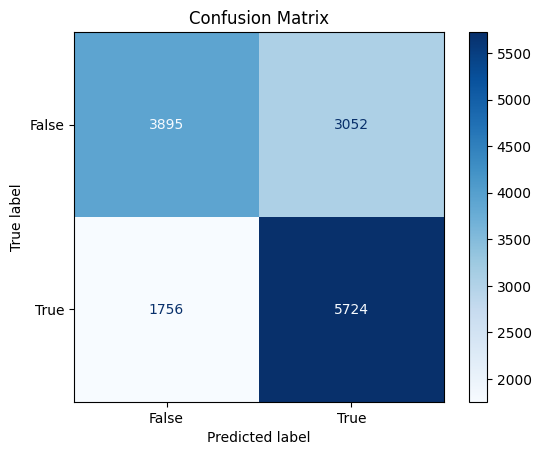

In [32]:
!pip install h5py
!ls

import h5py

# Load the file from the current directory
file_path = 'Dataset_first_new.h5'

# Open the HDF5 file in read mode ('r')
with h5py.File(file_path, 'r') as f:
    input_ids = np.array(f['input_ids'])  # Use input_ids as embeddings
    labels = np.array(f['labels'])  # Load labels

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression
log_reg = LogisticRegression(max_iter=200, solver='saga', penalty='l2', C=1.0)
log_reg.fit(X_train, y_train)

# Step 4: Evaluate the Model
predictions = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['False', 'True']))

# Step 5: Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['False', 'True'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')


In [33]:
# Extract feature importance
feature_weights = log_reg.coef_[0]  # Weights for the first class

# Show the top 10 most influential features
top_positive_indices = np.argsort(feature_weights)[-10:]  # Top 10 positive weights
top_negative_indices = np.argsort(feature_weights)[:10]  # Top 10 negative weights

print("\nTop 10 Features Predicting 'Real' News:")
print(top_positive_indices)

print("\nTop 10 Features Predicting 'Fake' News:")
print(top_negative_indices)


# Find misclassified samples
misclassified_indices = np.where(predictions != y_test)[0]

# Display a few misclassified examples
print("\nExamples of Misclassified Samples:")
for idx in misclassified_indices[:5]:  # Show up to 5 examples
    print(f"Sample {idx}:")
    print(f"Input IDs: {X_test[idx]}")
    print(f"True Label: {'Fake' if y_test[idx] == 0 else 'Real'}")
    print(f"Predicted Label: {'Fake' if predictions[idx] == 0 else 'Real'}\n")


Top 10 Features Predicting 'Real' News:
[ 49 433  44 389 256   7   6   9   5   0]

Top 10 Features Predicting 'Fake' News:
[  3 511   4   1   2 495 509 471 470 431]

Examples of Misclassified Samples:
Sample 4:
Input IDs: [  101  2009  2001  1037  4659  3576 28616  3270  2361  1517  2195  3765
  2006  1037  2047  3933  6671  3345  5598  1996  3162  2006  6928  2851
  2012  3552  2276  1999  2047  2259  1012  2021  2011  1996  2279  2154
  1010  2009  2018 16690  2094  2046  1037  5193  5325  1010 24845  2075
  3604  2039  1998  2091  1996  2264  3023  1010  2039 18537  1996  3268
  1997  5606  1997  5190  1997  2111  1010  1998 14954  2135 28252  1996
 13072  2110  1997  6502  1999  1996  3842  1521  1055 20530  6671  7120
  1012  1996  4315 12502  3672  3047  2012  1037 12536 16769  2391  2503
  2167  2637  1521  1055 20530  3345  2276  1517  1037 10789  1998 24067
  2100 24239  2008  2001  2196  3214  2000  5047  1037  3679  4834  1997
  5174  1010  2199  5467  1998  1015  1010  399